In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 数据加载

In [2]:
train_data = pd.read_csv('../01_data/used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv('../01_data/used_car_testB_20200421.csv', sep=' ')

In [3]:
train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


In [4]:
test_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379


In [5]:
result = pd.DataFrame()
result['SaleID'] = test_data['SaleID']

## 数据探索

In [6]:
# 缺失值查看
temp = train_data.isnull().sum()
temp = temp[temp > 0].index
print('{} 中有缺失值'.format(list(temp)))

['model', 'bodyType', 'fuelType', 'gearbox'] 中有缺失值


In [7]:
# 查看数据整体
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [8]:
# 查看数据的数值类型
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

### 数值类型分析

In [9]:
all_columns = train_data.columns.to_list()
#all_columns

In [10]:
number_columns = train_data.select_dtypes(include=['number']).columns.to_list()
print('数值类型的特征：{}'.format(number_columns))

数值类型的特征：['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']


In [11]:
other_columns = train_data.select_dtypes(exclude=['number']).columns.to_list()
print('非数值类型的特征：{}'.format(other_columns))

非数值类型的特征：['notRepairedDamage']


## 特征分析

#### SaleID - 交易ID

In [12]:
train_data['SaleID'].unique()

array([     0,      1,      2, ..., 149997, 149998, 149999], dtype=int64)

SaleID是0到149999的连续值，对价格基本没什么影响，所以这个特征不要

#### name - 汽车交易名称

In [13]:
train_data['name'].unique()

array([   736,   2262,  14874, ..., 147587,  45907, 177672], dtype=int64)

In [14]:
train_data['name'].value_counts()

708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64

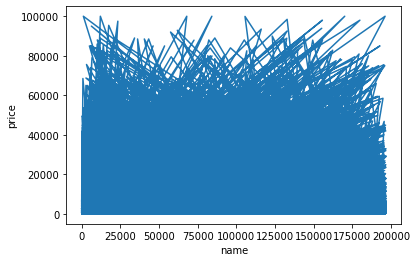

In [15]:
plt.plot(train_data['name'], train_data['price'])
plt.xlabel('name')
plt.ylabel('price')
plt.show()

#### regDate - 汽车注册日期

In [16]:
train_data['regDate'].value_counts()

20000008    180
20000011    158
20000004    157
20000010    157
20000002    155
           ... 
19910807      1
19910902      1
20151209      1
19911011      1
20151201      1
Name: regDate, Length: 3894, dtype: int64

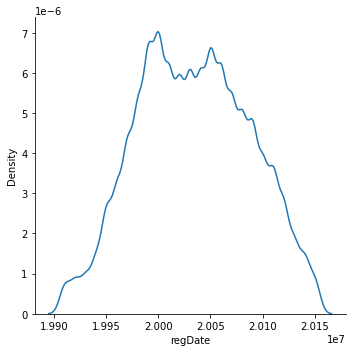

In [17]:
sns.displot(train_data['regDate'], kind='kde')

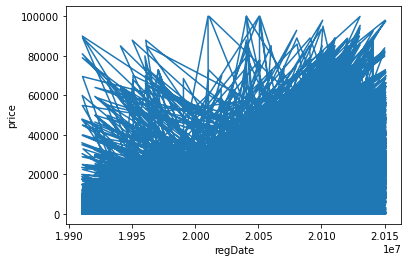

In [18]:
plt.plot(train_data['regDate'], train_data['price'])
plt.xlabel('regDate')
plt.ylabel('price')
plt.show()

基本是车越新价格越高，但是也有一些例外，可能是受其他因素影响，比如品牌等

#### model - 车型编码

In [19]:
train_data['model'].value_counts()

0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64

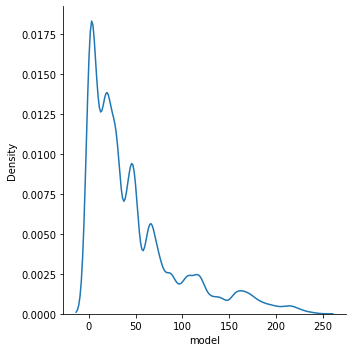

In [20]:
sns.displot(train_data['model'], kind='kde')

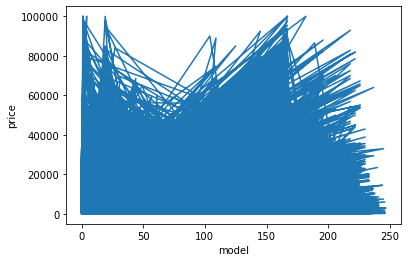

In [21]:
plt.plot(train_data['model'], train_data['price'])
plt.xlabel('model')
plt.ylabel('price')
plt.show()

#### brand - 汽车品牌

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='brand', ylabel='count'>

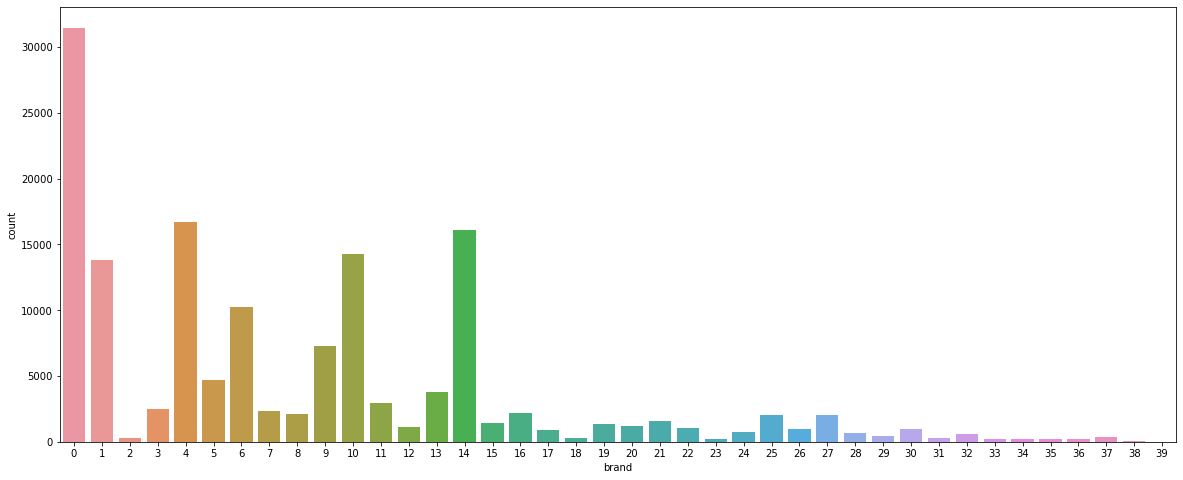

In [22]:
plt.figure(figsize=(20, 8))
sns.countplot('brand', data=train_data)

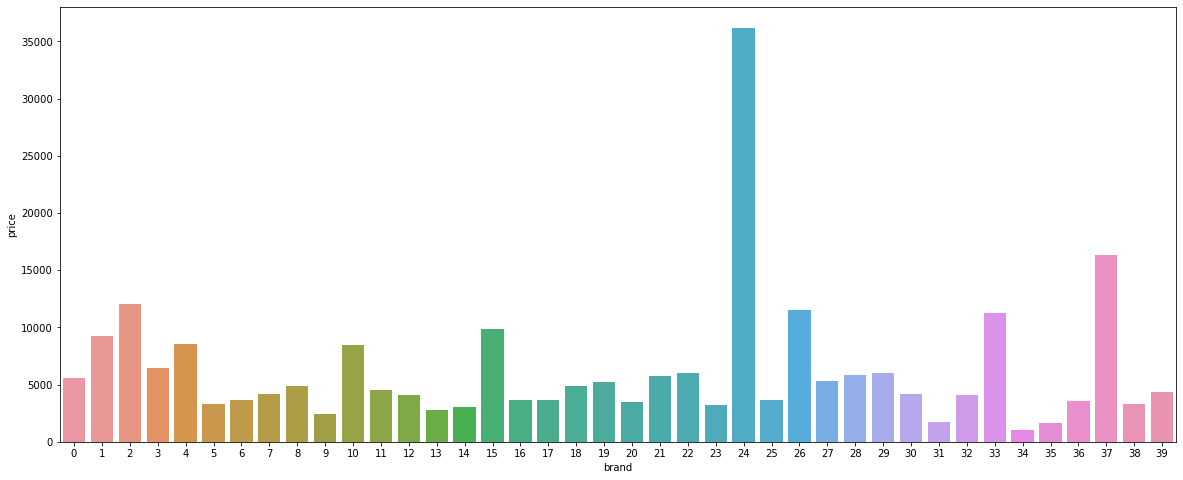

In [23]:
brand_data = train_data.groupby('brand')['price'].mean()
plt.figure(figsize=(20,8))
sns.barplot(x=brand_data.index, y=brand_data)
plt.xlabel('brand')
plt.ylabel('price')
plt.show()

#### bodyType - 车身类型

<AxesSubplot:xlabel='bodyType', ylabel='count'>

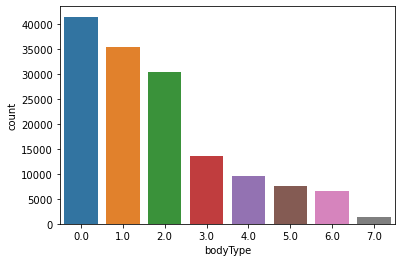

In [24]:
sns.countplot(x=train_data['bodyType'])

#### fuelType - 燃油类型

In [25]:
train_data['fuelType'].value_counts()

0.0    91656
1.0    46991
2.0     2212
3.0      262
4.0      118
5.0       45
6.0       36
Name: fuelType, dtype: int64

<AxesSubplot:xlabel='fuelType', ylabel='count'>

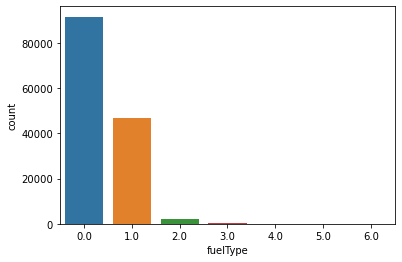

In [26]:
sns.countplot(x='fuelType', data=train_data)

#### gearbox - 变速箱

In [27]:
train_data['gearbox'].value_counts()

0.0    111623
1.0     32396
Name: gearbox, dtype: int64

<AxesSubplot:xlabel='gearbox', ylabel='price'>

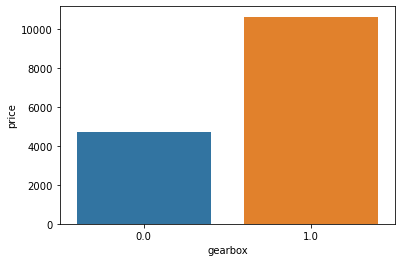

In [28]:
gearbox_data = train_data.groupby('gearbox')['price'].mean()
sns.barplot(x=gearbox_data.index, y=gearbox_data)

自动挡变速箱的汽车一般比手动挡的要贵一些

#### power - 发动机功率

In [29]:
train_data['power'].value_counts()

0       12829
75       9593
150      6495
60       6374
140      5963
        ...  
1597        1
1596        1
572         1
316         1
575         1
Name: power, Length: 566, dtype: int64

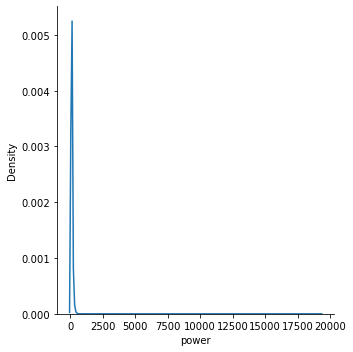

In [30]:
sns.displot(x='power', data=train_data, kind='kde')

#### kilometer - 汽车行驶距离

In [31]:
train_data['kilometer'].value_counts()

15.0    96877
12.5    15722
10.0     6459
9.0      5257
8.0      4573
7.0      4084
6.0      3725
5.0      3144
4.0      2718
3.0      2501
2.0      2354
0.5      1840
1.0       746
Name: kilometer, dtype: int64

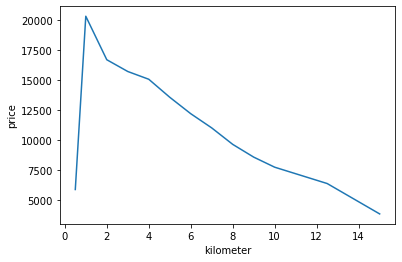

In [32]:
kilometer_data = train_data.groupby('kilometer')['price'].mean()
plt.plot(kilometer_data.index, kilometer_data)
plt.xlabel('kilometer')
plt.ylabel('price')
plt.show()

<AxesSubplot:xlabel='kilometer', ylabel='Density'>

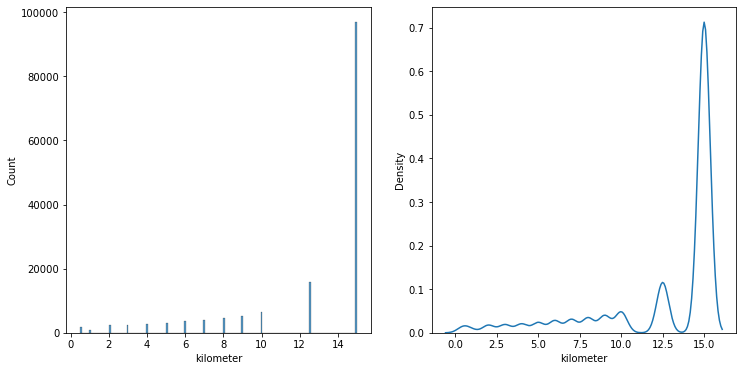

In [33]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(x=train_data['kilometer'], ax=ax[0])
sns.kdeplot(x=train_data['kilometer'], ax=ax[1])

notRepairedDamage - 汽车有尚未修复的损坏

In [34]:
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

#### regionCode - 地区编码

In [35]:
train_data['regionCode'].value_counts()

419     369
764     258
125     137
176     136
462     134
       ... 
6414      1
7063      1
4239      1
5931      1
7267      1
Name: regionCode, Length: 7905, dtype: int64

#### seller - 销售方

In [36]:
train_data['seller'].value_counts()

0    149999
1         1
Name: seller, dtype: int64

特征分布极其不均，此特征不作参考

#### offerType - 报价类型

In [37]:
train_data['offerType'].value_counts()

0    150000
Name: offerType, dtype: int64

销售方全是个体，此特征没有参考意义

#### createDate - 汽车上线时间

In [38]:
train_data['creatDate'].value_counts()

20160403    5848
20160404    5606
20160320    5485
20160312    5383
20160402    5382
            ... 
20151227       1
20151217       1
20160131       1
20160130       1
20160115       1
Name: creatDate, Length: 96, dtype: int64

#### V系列特征

暂时不作分析

## 特征类型变换

把非数值类型转换成数值类型

***notRepairedDamage***

In [39]:
train_data['notRepairedDamage'].replace('-', '0.0', inplace=True)
train_data['notRepairedDamage'] = train_data['notRepairedDamage'].apply(lambda x : int(float(x)))
train_data['notRepairedDamage'].value_counts()

0    135685
1     14315
Name: notRepairedDamage, dtype: int64

In [40]:
test_data['notRepairedDamage'].replace('-', '0.0', inplace=True)
test_data['notRepairedDamage'] = test_data['notRepairedDamage'].apply(lambda x : int(float(x)))
test_data['notRepairedDamage'].value_counts()

0    45293
1     4707
Name: notRepairedDamage, dtype: int64

## 特征相关性分析

<AxesSubplot:>

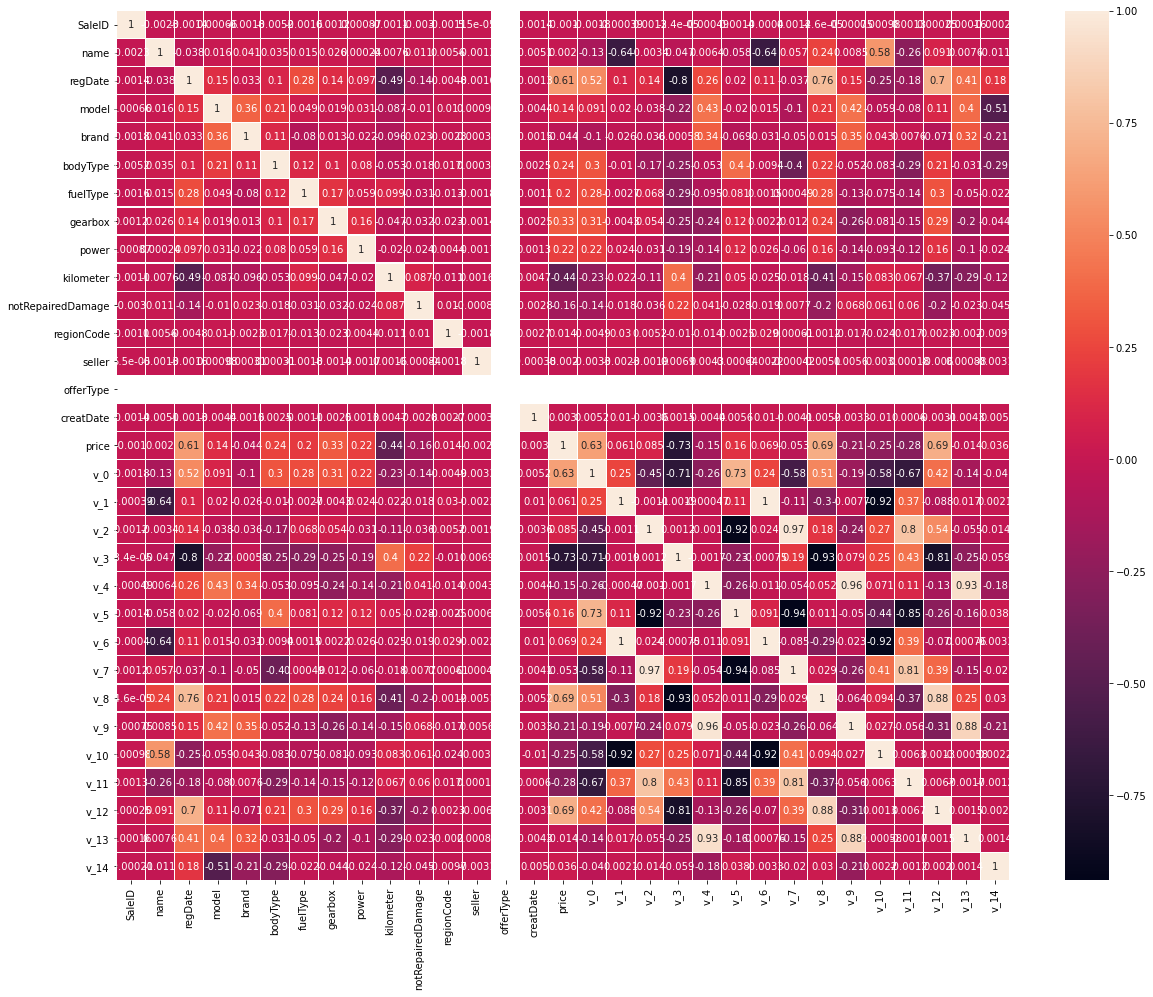

In [41]:
plt.figure(figsize=(20,16))
sns.heatmap(train_data.corr(), annot=True, linewidths=0.2)

In [42]:
# |关联值|>=0.2的特征
temp = train_data.corr()
temp = temp[np.abs(temp['price']) >= 0.2]
temp['price']

regDate      0.611959
bodyType     0.241303
fuelType     0.200536
gearbox      0.329075
power        0.219834
kilometer   -0.440519
price        1.000000
v_0          0.628397
v_3         -0.730946
v_8          0.685798
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
v_12         0.692823
Name: price, dtype: float64

## 特征筛选

##### 不要的特征

In [43]:
drop_columns = ['SaleID', 'seller', 'offerType']

In [44]:
train_data.drop(columns=drop_columns, inplace=True)

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               150000 non-null  int64  
 1   regDate            150000 non-null  int64  
 2   model              149999 non-null  float64
 3   brand              150000 non-null  int64  
 4   bodyType           145494 non-null  float64
 5   fuelType           141320 non-null  float64
 6   gearbox            144019 non-null  float64
 7   power              150000 non-null  int64  
 8   kilometer          150000 non-null  float64
 9   notRepairedDamage  150000 non-null  int64  
 10  regionCode         150000 non-null  int64  
 11  creatDate          150000 non-null  int64  
 12  price              150000 non-null  int64  
 13  v_0                150000 non-null  float64
 14  v_1                150000 non-null  float64
 15  v_2                150000 non-null  float64
 16  v_

In [46]:
test_data.drop(columns=drop_columns, inplace=True)

## BaseLine

In [47]:
# baseline中暂时不用的特征
baseline_drop_columns = ['regDate', 'creatDate']
train_data.drop(columns=baseline_drop_columns, inplace=True)

In [48]:
test_data.drop(columns=baseline_drop_columns, inplace=True)

使用XGBoost

In [49]:
# 模型创建 - XGBoost
import xgboost as xgb
param = {
    #'objective' : 'reg:linear',
    'eval_metric' : 'auc',
    'tree_method' : 'gpu_hist',
    'max_depth' : 6,
    'colsample_bytree': 0.8,
    'min_child_samples' : 3,
    'subsample' : 0.8,
    'reg_lambda' : 0.5,
    'learning_rate' : 0.05,
    'n_estimators' : 300,
}
model = xgb.XGBRegressor(
    max_depth=6, learning_rate=0.05, n_estimators=300, 
    objective='reg:linear', tree_method='gpu_hist', 
    subsample=0.8, colsample_bytree=0.8, 
    min_child_samples=3, eval_metric='auc', reg_lambda=0.5
)

In [50]:
X_train = train_data.drop(columns=['price'])
Y_test = train_data['price']
X_test = test_data

In [51]:
model.fit(X_train, Y_test)

[23:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:55:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_child_samples" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='auc',
             gamma=0, gpu_id=0, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_samples=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=6,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=0.5, scale_pos_weight=1, subsample=0.8,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [52]:
y_predictions = model.predict(X_test)
y_predictions

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([1238.678 , 1851.6708, 8459.862 , ..., 5649.844 , 5332.604 ,
       5334.7734], dtype=float32)

In [53]:
def show_status(data):
    print('max: {}'.format(np.max(data)))
    print('min: {}'.format(np.min(data)))
    print('ptp: {}'.format(np.ptp(data)))
    print('std: {}'.format(np.std(data)))
    print('mean: {}'.format(np.mean(data)))
    print('var: {}'.format(np.var(data)))

In [54]:
show_status(y_predictions)

max: 92429.765625
min: -375.96600341796875
ptp: 92805.734375
std: 7351.22607421875
mean: 5912.57666015625
var: 54040528.0


In [55]:
result['price'] = y_predictions
temp = result['price']
temp[temp < 0] = 11
result['price'] = temp
show_status(result['price'])

max: 92429.765625
min: 0.015033535659313202
ptp: 92429.75
std: 7351.17578125
mean: 5912.59765625
var: 54039784.0


<ipython-input-55-77b515c3bf78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[temp < 0] = 11


In [59]:
result.to_csv('../05_prediction_result/xgb_predictions_v1.csv')

训练和测试数据保存

In [58]:
import pickle
train_data.to_pickle('../02_user_data/train_v1.pk')
test_data.to_pickle('../02_user_data/test_v1.pk')